# Project Question
### Main Question 1
What are the most frequent words in the novel "Moby Dick" by Herman Melville and what is the frequency of their occurrence?

#### Sub-Question 1.1
How can we scrape the novel from the Project Gutenberg website using Python?

In this notebook, we will explore the text of Moby Dick, extract the words, and use natural language processing tools to analyze the distribution of words. By the end of this notebook, we will have a visualization of the word frequency distributions and be able to answer the project question.

## 1. Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="datasets/Moby_Dick_p510_illustration.jpg" </p>
    
This notebook demonstrates how to scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a>, extract words from the text using the Python package <code>requests</code> and <code>BeautifulSoup</code>, and analyze the frequency distribution of words using the Natural Language Toolkit (<code>nltk</code>). <p>The goal is to determine the most common words in the novel and how often they occur. The techniques presented in this notebook can be applied to any novel available on Project Gutenberg, and the natural language processing tools used are useful for analyzing unstructured text data commonly encountered in data science.</p> <p>The notebook assumes the use of Python and imports the packages necessary for the analysis.</p>

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

## 2. Request Moby Dick
To perform analysis on Moby Dick, we need to obtain its contents from an online source. Fortunately, the text is freely available on Project Gutenberg's website as an HTML file:  [Link to Moby Dick](https://www.gutenberg.org/files/2701/2701-h/2701-h.htm)

HTML (Hypertext Markup Language) is the standard markup language used for creating web pages.

To obtain the HTML file of Moby Dick, we'll use the requests package to make a GET request to the website. This is similar to what happens when you visit a webpage through a browser, except that we'll be getting the requested page directly into Python instead of displaying it on a browser.

In [2]:
response = requests.get('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm')

# Setting the correct text encoding of the HTML page
response.encoding = 'utf-8'

# Extracting the HTML from the request object
html = response.text

# Printing the first 2000 characters in html
print(html[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

<style type="text/css" xml:space="preserve">

    body {margin-left:15%; margin-right:15%; text-align:justify }
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    pre       

## 3. Get the text from the HTML

We need to extract the text of Moby Dick from the HTML we fetched earlier. To do this, we'll use the <code>BeautifulSoup</code> package. <code>BeautifulSoup</code> is a Python library that makes it easy to scrape information from web pages.

To begin with, we need to create a BeautifulSoup object from the HTML we fetched earlier. The BeautifulSoup object represents the parsed HTML document, and provides a range of methods for navigating and searching the document's structure. We can use the <code>.get_text()</code> method of the BeautifulSoup object to extract the text of the novel.



In [3]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000: 34000])

inging up the rear
      of every funeral I meet; and especially whenever my hypos get such an
      upper hand of me, that it requires a strong moral principle to prevent me
      from deliberately stepping into the street, and methodically knocking
      people’s hats off—then, I account it high time to get to sea as soon
      as I can. This is my substitute for pistol and ball. With a philosophical
      flourish Cato throws himself upon his sword; I quietly take to the ship.
      There is nothing surprising in this. If they but knew it, almost all men
      in their degree, some time or other, cherish very nearly the same feelings
      towards the ocean with me.
    

      There now is your insular city of the Manhattoes, belted round by wharves
      as Indian isles by coral reefs—commerce surrounds it with her surf.
      Right and left, the streets take you waterward. Its extreme downtown is
      the battery, where that noble mole is washed by waves, and cooled by
      bre

## 4. Extract the words
After extracting the text of the novel, the next step is to tokenize the text and split it into a list of words. This can be achieved using the nltk package - the Natural Language Toolkit. Tokenization involves removing non-word characters such as whitespace, punctuation, etc. and splitting the text into a list of words.

To tokenize the text, we can use the <code>nltk.tokenize</code> module, which provides several methods for tokenization. The most commonly used method is the <code>word_tokenize()</code> function, which tokenizes the text into words.

In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']


## 5. Make the words lowercase
Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in Moby Dick in which all capital letters have been made lower case.

In [5]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or']


## 6. Load in stop words

It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as stop words. The package <code>nltk</code> includes a good list of stop words in English that we can use.

In [6]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Remove stop words in Moby Dick
Our goal now is to generate a new list of words from Moby Dick that excludes stop words, which are words that do not carry significant meaning such as "the", "a", "an", etc. These stop words are listed in the variable <code>sw</code>. One approach to creating this list is to iterate over all elements in the words list, and append each word to a new list if it is not a stop word.

In [7]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['project', 'gutenberg', 'ebook', 'moby', 'dick']


## 8. We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in the novel "Moby Dick" by Herman Melville and what is the frequency of their occurrence?</p>
</blockquote>
<p>We are now ready to answer that! Let's create a word frequency distribution plot using <code>nltk</code>. </p>

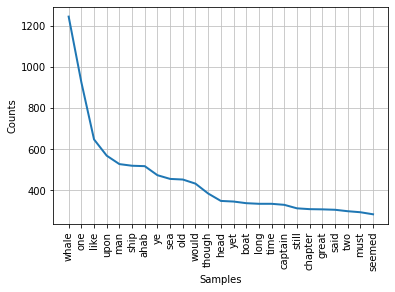

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## 9. The most common word

Great job! The frequency distribution plot displayed above provides us with the solution to our question.

The natural language processing applied in this notebook can also be employed to a significant amount of unstructured data, which constitutes a considerable portion of the data that Data Scientists typically encounter and encompasses extensive amounts of textual data.

Therefore, which word emerged as the most frequent in Moby Dick, as expected?

In [9]:
# What's the most common word in Moby Dick?
most_common_word = 'whale'